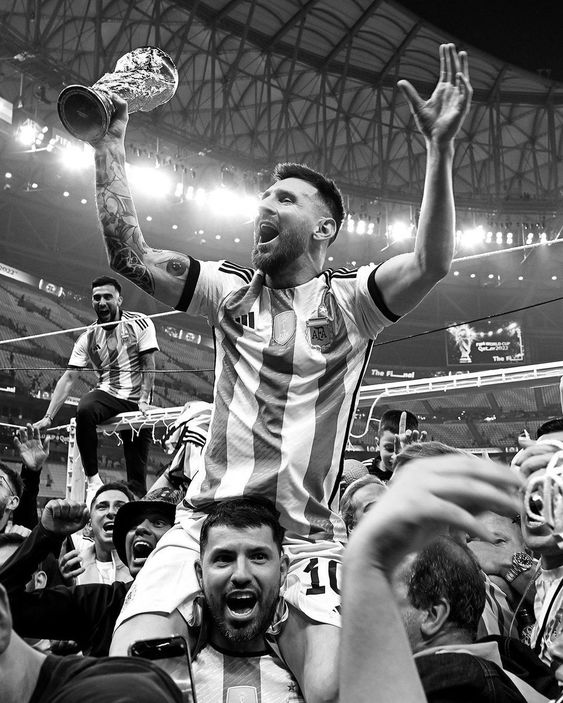

In [2]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
img = cv.imread("img.png",0)
fast = cv.FastFeatureDetector_create()
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img,kp,None,color=(255,0,0))
cv2_imshow(img)

In [3]:
print("threshold: {}".format(fast.getThreshold()))
print("nonmaxSuppression: {}".format(fast.getNonmaxSuppression()))
print("neighborhood: {}".format(fast.getType()))
print("Total keypoints with nonmaxSuppression: {}".format(len(kp)))

threshold: 10
nonmaxSuppression: True
neighborhood: 2
Total keypoints with nonmaxSuppression: 12678


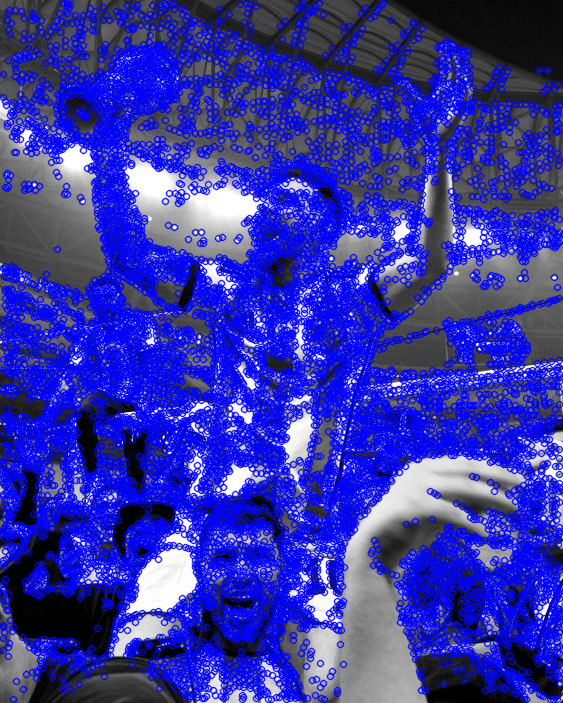

In [4]:
cv2_imshow(img2)

Total keypoints without nonmaxSuppression: 52827


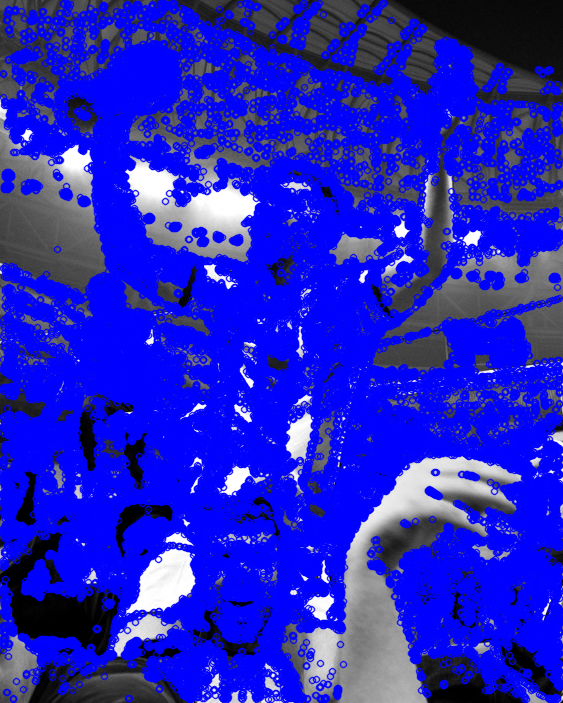

In [5]:
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print("Total keypoints without nonmaxSuppression: {}".format(len(kp)))
img3 = cv.drawKeypoints(img,kp,None,color=(255,0,0))
cv2_imshow(img3)

32
(925, 32)


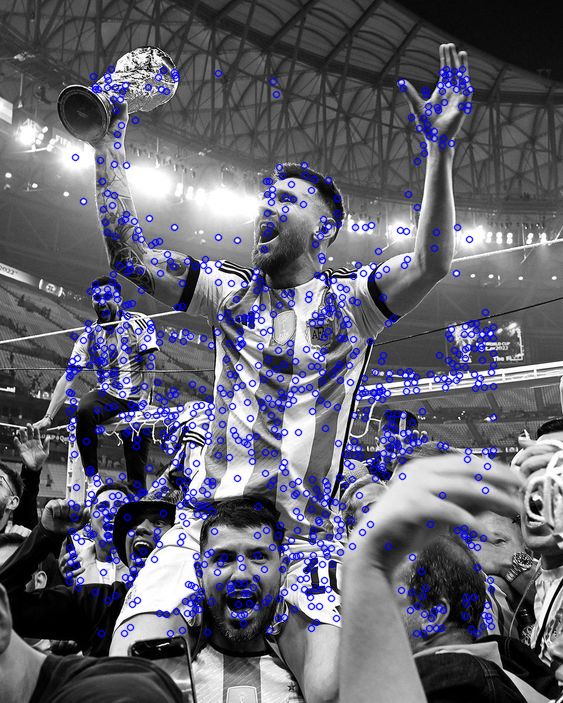

In [6]:
star = cv.xfeatures2d.StarDetector_create()
breif = cv.xfeatures2d.BriefDescriptorExtractor_create()
kp = star.detect(img,None)
kp,des = breif.compute(img,kp)

print(breif.descriptorSize())
print(des.shape)
img4 = cv.drawKeypoints(img,kp,None,color=(255,0,0))
cv2_imshow(img4)

In [7]:
print(des)

[[228 250 143 ... 168 191 212]
 [181 165 187 ... 199  29  44]
 [164 216 213 ... 164 122 146]
 ...
 [ 49  81  72 ... 215  64 101]
 [ 48  69  10 ...  79  80  39]
 [224 232  70 ... 250 226 197]]


In [8]:
print(len(kp))

925


500


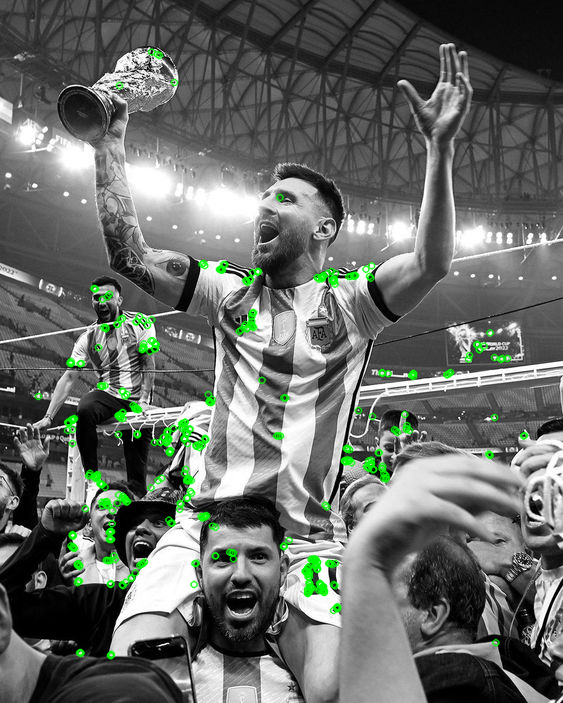

In [9]:
#ORB Algorithm
orb = cv.ORB_create()
kp = orb.detect(img,None)
kp,des = orb.compute(img,kp)
print(len(kp))
img5 = cv.drawKeypoints(img,kp,None,(0,255,0),flags=0)
cv2_imshow(img5)

In [10]:
print(des.shape)

(500, 32)


In [11]:
print(len(kp))

500


In [12]:
#Feature Matching and Model Fitting
#Feature matching identifies and compares distinct features in the images to establish correspondences b/w diff. parts of an image or b/w diff. images
#Features could be: corners, edges, keypoints, or other distinctive visual elements
#Weighted dist. func. is used to measure degrss of similarity or dissimilarity b/w features extracted

In [13]:
#BURTE FORCE MATCHER
#Directly matches features b/w two sets of discriptors to find best matches

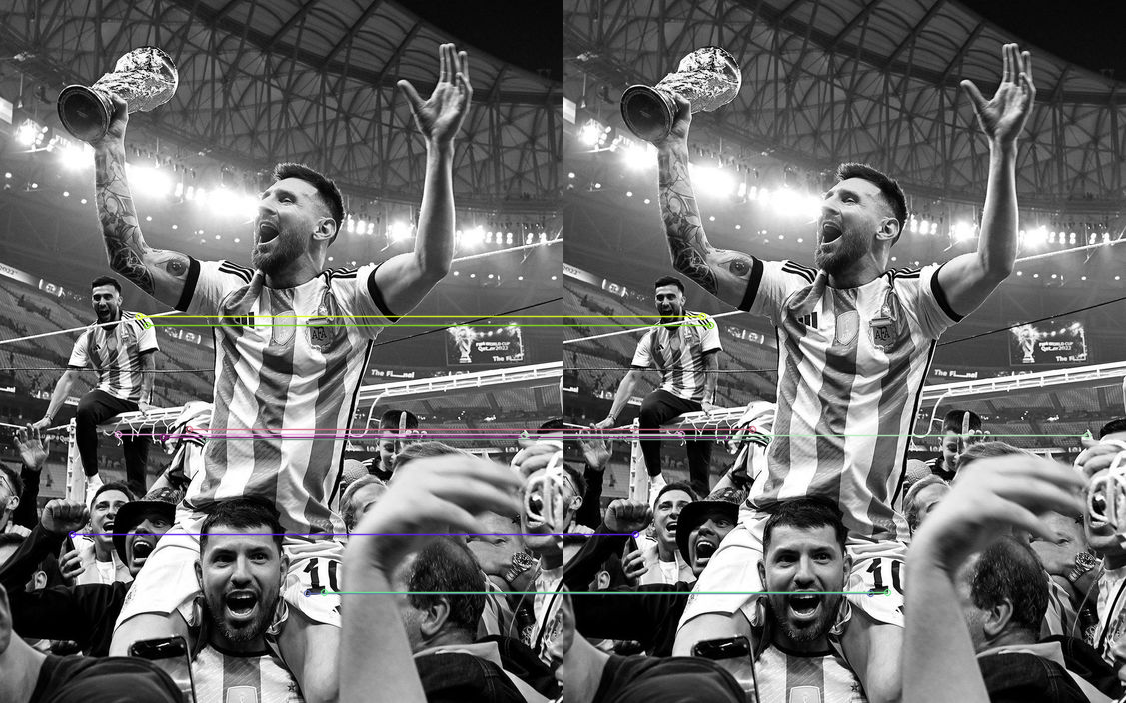

In [14]:
import cv2
import numpy as np

img1 = cv2.imread('img.png',0)
img2 = cv2.imread('img-3.png',0)

orb = cv2.ORB_create()

keypoints1, descriptors1 = orb.detectAndCompute(img1,None)
keypoints2, descriptors2 = orb.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches,key=lambda x:x.distance)

matched_img = cv2.drawMatches(img1,keypoints1,img2,keypoints2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(matched_img)

In [15]:
#BFMatcher using KNN
#involves finding k nearest best matches for each descriptor set

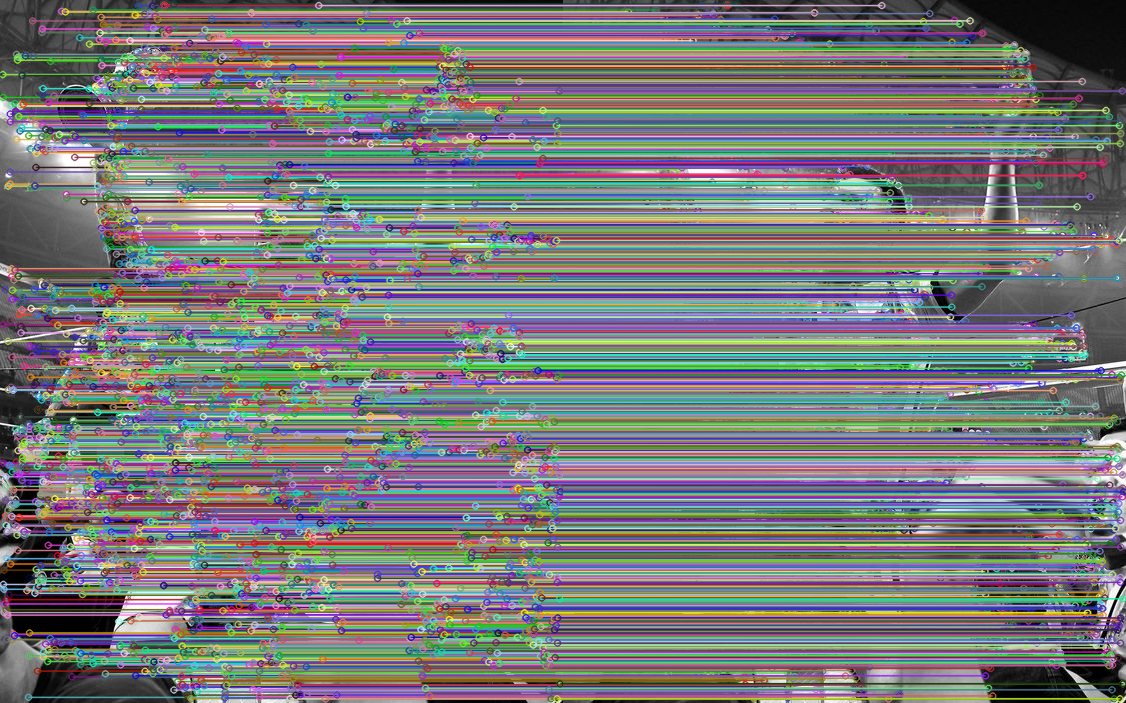

In [16]:
import cv2
import numpy as np

img1 = cv2.imread('img.png',0)
img2 = cv2.imread('img-3.png',0)

sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(img1,None)
keypoints2, descriptors2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher()

matches = bf.knnMatch(descriptors1, descriptors2,k=2)
good_matches=[]
for m,n in matches:
  if m.distance < 0.13 * n.distance:
    good_matches.append(m)

matched_img = cv2.drawMatches(img1,keypoints1,img2,keypoints2,good_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(matched_img)

In [17]:
#SIMILARITY MEASURES
#Euclidean distance
#Cosine Similarity:Used for rotated images
#Manhattan Distance
#Minkowski Distance:generalization of euclidean, manhattan distance
#Jaccard Index:divides size of intersection by the size of the union of two sets
#Structural Similarity Index(SSI):considers luminance,contrast,structure--reflects human perception
#Hamming Distance:clacs. no of positions at which elements are different
#correlation coefficient


In [18]:
#EARTH MOVER'S DISTANCE(EMD)

#Compares images using their historams
#Calcs cost of transforming one distribution into another.cost is associated with moving a unit of mass from one pont to another
#Amount of work needed to transform one historam to another

In [19]:
import cv2
import numpy as np

img_1 = cv2.imread("img.png",0)
img_2 = cv2.imread("img-3.png",0)

hist1 = cv2.calcHist([img_1],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img_2],[0],None,[256],[0,256])

hist1 /= hist1.sum()
hist2 /= hist2.sum()

dist_matrix = np.zeros((256,256),dtype=np.float32)
for i in range(256):
  for j in range(256):
    dist_matrix[i][j] = abs(i-j)

In [24]:
#KD TREES
#represents data in 3d space
#like nearest neighbour search

In [ ]:
#Locality Sensitivity Hashing
#hashing is used to find the particluar features that have matched

In [ ]:
#In HSV or HSL:
#0-60 degrees:Red
#61-120:Yellow
#121-180:Green
#181-240:Cyan
#241-300:Blue
#301-360:Magenta

In [ ]:
#RANGE IMAGE PROCESSING
#2-1D or 3D representation of data
#records distance to scene for each image pixel

In [ ]:
#Techniques:
#Passive: Sterio imaging
#Active: Time of flight. Triangulation, structured light

#Active Range Sensors:
# Emit light/sound to measure distance b/w objects by calc. time taken for light/sound to bounce off the object and return
# Time-of-Flight Sensors:
# Light detection and renging(LIDAR)
# Laser radar(LADAR)
# it is limited by min distance observable of an object

In [ ]:
#Triangulation Sensors:
#Uses angle and position of reflected signal to measure position of object
#Most widely used

In [ ]:
#Range Data Segmentation:

#Extracting/dividing a portion of data collected by the sensors.
#There is no overlap b/w these divisions
#used to identify obstaces or distinct regions wothin the sensors feild of view for analysis/desision making


In [26]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


In [27]:
def region_growing(img,seed):
  height,width = img.shape[:2]

  mask = np.zeros_like(img,dtype=np.unit8)

  queue= []

  queue.append(seed)

  connectivity = [(1,0),(-1,0),(0,1),(0,-1),(1,1),(-1,-1),(1,-1),(-1,1)]

  while len(queue) > 0:
    x,y = queue.pop(0)
    if(x >= 0  and x < height and y >= 0 and y < width and mask[x,y] == 0):
      if abs(int(img[x,y]) - int(img[seed])) < 10:
        mask[x,y] = 255
        for dx,dy in connectivity:
          queue.append((x+dx,y+dy))
  return mask

In [28]:
img = cv2.imread('/content/2021-12-26 (1).png',0)
seed=(100,100)

In [ ]:
#Probabiilistic Classification:

#ML tech. used to assign data points to one of several pre defined calsses or categories while giving a measure of confidence assocaited with that assignment
#Used for tasks like binary classification or multiclass classification
#Typically assigns a probability score to each class for a given data input
#Class with the hiighest score is usually chosen

#Commom=n techniques:
# Logistic Regression, Naive Bayes, Support Vector Machine(SVM), Random Forest, Neural Network, Gradient Boosting

#IN DEEP LEARNING:
#This approach provides richer info about the model's confidence in its predictions and can be particularly useful in tasks where underestanding uncertainty is critical


#Softmax Activation:
#   Most commonly used in output layer of a N.N. It takes vator of raw scores and converts them into a probability distribution over multiple classes.It ensures sum of all probabilities = 1

# Cross-Entorpy Loss:
#   It measures the dissimilarity b/w predicted distribution and true distribution

#Prediction w/ Probability Distributions:
#   It provides the entire probability  distribution over the class.

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


In [30]:
f_dataset = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = f_dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [31]:
class_names = ['T-shirt/top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
train_images.shape

(60000, 28, 28)

In [32]:
len(train_labels)

60000

In [33]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [34]:
test_images.shape

(10000, 28, 28)

In [35]:
len(test_images)

10000

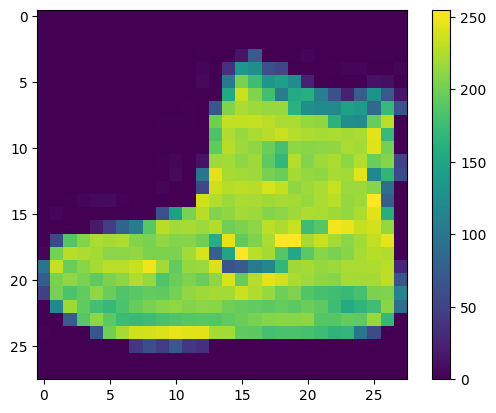

In [36]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [37]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),#Flatten layer converts 2d data into 1d format--input layer
    tf.keras.layers.Dense(128,activation='relu'),#Dense layer is a fully connected layer where all nodes of this layer are connected to all nodes of previous layer '128' is the number of neurons used--hidden layer
    tf.keras.layers.Dense(64,activation='relu'),#Hidden layer-2
    tf.keras.layers.Dense(32,activation='relu'),#Hidden layer-3
    tf.keras.layers.Dense(16,activation='relu'),#Hidden layer-4
    tf.keras.layers.Dense(10)#Final output layer '10' shows the final number of output classes--usually softmax is applied here
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.fit(train_images,train_labels,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5438 - accuracy: 0.8099
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3805 - accuracy: 0.8609
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3426 - accuracy: 0.8747
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3199 - accuracy: 0.8819
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3014 - accuracy: 0.8894
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2858 - accuracy: 0.8947
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2737 - accuracy: 0.8980
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2651 - accuracy: 0.9019
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2571 - accuracy: 0.9049
Epoch 10/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.24

In [41]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f'\nTest Accuracy: {test_acc}')

313/313 - 1s - loss: 0.3456 - accuracy: 0.8880 - 729ms/epoch - 2ms/step

Test Accuracy: 0.8880000114440918


In [42]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [43]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [44]:
predictions[0]

array([1.5574790e-07, 2.7206030e-07, 3.6056900e-08, 2.1969891e-10,
       5.2975951e-10, 4.3723071e-06, 7.3408026e-09, 5.7452456e-03,
       4.6154810e-07, 9.9424946e-01], dtype=float32)

In [45]:
for n in range(0,len(class_names)):
  print(f'Predicted value for {n} label: ',np.argmax(predictions[n]))

Predicted value for 0 label:  9
Predicted value for 1 label:  2
Predicted value for 2 label:  1
Predicted value for 3 label:  1
Predicted value for 4 label:  6
Predicted value for 5 label:  1
Predicted value for 6 label:  4
Predicted value for 7 label:  6
Predicted value for 8 label:  5
Predicted value for 9 label:  7


In [46]:
for n in range(0,len(class_names)):
  print(f'Given value for label number {n}: ',test_labels[n])

Given value for label number 0:  9
Given value for label number 1:  2
Given value for label number 2:  1
Given value for label number 3:  1
Given value for label number 4:  6
Given value for label number 5:  1
Given value for label number 6:  4
Given value for label number 7:  6
Given value for label number 8:  5
Given value for label number 9:  7


In [47]:
img = test_images[1]
print(img.shape)

(28, 28)


In [48]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [49]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 38ms/step
[[4.2212519e-06 3.3660557e-12 9.9946111e-01 1.4854342e-11 4.0142488e-04
  1.4407170e-24 1.3329521e-04 3.7856402e-20 2.5668953e-10 3.0255286e-21]]


In [50]:
np.argmax(predictions_single[0])

2

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
Total params: 111514 (435.60 KB)
Trainable params: 11151

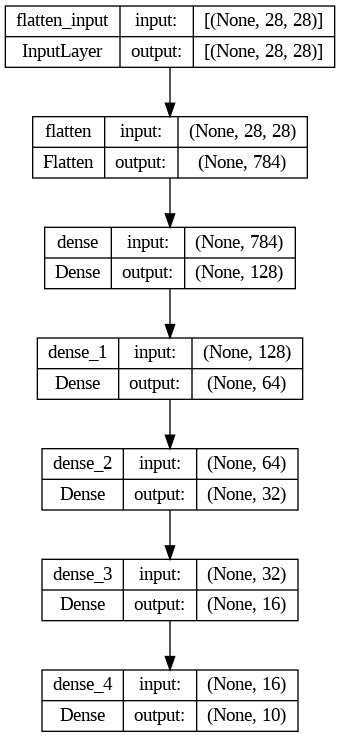

In [52]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [53]:
 import numpy as np
 from sklearn.datasets import fetch_openml
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import MinMaxScaler
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.metrics import accuracy_score

In [54]:
mnist = fetch_openml("mnist_784")
f_mnist = fetch_openml("Fashion-MNIST")
X,y = mnist.data,mnist.target
X_f,y_f = f_mnist.data,f_mnist.target
print(X.shape)
print(X_f.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
(70000, 784)


In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train_f,X_test_f,y_train_f,y_test_f = train_test_split(X_f,y_f,test_size=0.2,random_state=42)

In [56]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_f = scaler.fit_transform(X_train_f)
X_test_f = scaler.transform(X_test_f)

In [57]:
k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

knn.fit(X_train_f,y_train_f)

KNeighborsClassifier(n_neighbors=3)

In [58]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

y_pred_f = knn.predict(X_test_f)
accuracy_f = accuracy_score(y_test_f,y_pred_f)
print(f"Accuracy of Fashion: {accuracy_f * 100:.2f}%")

Accuracy: 9.44%
Accuracy of Fashion: 85.59%


In [59]:
#Dimansionality Reduction:
#PCA,LDA,KPCA
#PCA is unsupervised, LDA is supervised algorithm
#Diff b/w PCA , KPCA: PCA is for linearly sepreable data, KPCA is uned for non linearly sepreable data
#The imp. parameter for all these are no. of n_components
#the default n_components components:
# PCA- min(no._of_samples, no._of_features)
# LDA - min(no._of_features, no._of_calsses - 1)
#

In [60]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [61]:
mnist=fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [62]:
data,target = mnist.data,mnist.target
data.shape

(70000, 784)

In [63]:
norm = MinMaxScaler()
data_norm = norm.fit_transform(data)

In [64]:
x_train,x_test,y_train,y_test = train_test_split(data_norm,target,test_size=0.3)

In [65]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=500)
#x_train_pca = pca.fit_transform(x_train)
#x_test_pca = pca.transform(x_test)

In [66]:
#x_train_pca.shape

In [67]:
#import matplotlib.pyplot as plt
#import numpy as np

In [68]:
#plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [69]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [70]:
#lda = LDA()
#x_train_lda = lda.fit_transform(x_train,y_train)
#x_test_lda = lda.transform(x_test)

In [71]:
#x_train_lda.shape

In [72]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA()
x_train_kpca = kpca.fit_transform(x_train)
x_test_kpca = kpca.transform(x_test)